In [1]:
# load packages
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
# not needed, only to prettify the plots.
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline

In [2]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

In [3]:
# prettify the figures
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc('font', family='Times New Roman', size=15)
set_matplotlib_formats('png', 'png', quality=90)
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.grid'] = True

kw_save = dict(bbox_iches='tight', transparent=True)

In [4]:
# asset information
asset_info = '''
Banco do Brasil S.A. (BBAS3.SA)
Sao Paolo - Sao Paolo Delayed Price. Currency in BRL.
Source: https://finance.yahoo.com/quote/BBAS3.SA
'''

In [5]:
# useful functions
# ================
def total_return(prices):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    prices : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return prices.iloc[-1] / prices.iloc[0] - 1


def total_return_from_returns(returns):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    returns : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return (returns + 1).prod() - 1


def plot_this(df, title, figsize=None, ylabel='',
             output_file='imgs/fig.png', bottom_adj=0.25,
             txt_ymin=-0.4, bar=False):
    if bar:
        ax = df.plot.bar(title=title, figsize=figsize)
    else:
        ax = df.plot(title=title, figsize=figsize)
    sns.despine()
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.text(0, txt_ymin, asset_info, transform=ax.transAxes, fontsize=9)
    plt.gcf().subplots_adjust(bottom=bottom_adj)
    plt.savefig(output_file, **kw_save)

In [6]:
# Geting data
# ===========
today = '2017-09-26'  # to make static this script.
tckr = 'BBAS3.SA'  # Banco do Brasil SA
# download data
data = pdr.get_data_yahoo(tckr, "2014-01-01", today)
# add frequency needed for some pandas functionalities releated with offsets
data = data.asfreq('B')  
data.columns = data.columns.map(lambda col: col.lower())

[*********************100%***********************]  1 of 1 downloaded


In [7]:
data.head()  # first values

,open,high,low,close,adj close,volume
Date,,,,,,
2014-01-02,24.450001,24.480000,23.950001,24.000000,18.619471,4077900.0
2014-01-03,24.020000,24.250000,23.850000,24.250000,18.813421,5094600.0
2014-01-06,24.020000,24.049999,23.610001,23.889999,18.534130,3983200.0
2014-01-07,23.900000,24.100000,23.420000,23.480000,18.216047,4596200.0
2014-01-08,23.500000,23.570000,22.969999,23.010000,17.851410,6737300.0


In [8]:
data.tail()  # last values

,open,high,low,close,adj close,volume
Date,,,,,,
2017-09-19,34.610001,34.750000,34.060001,34.540001,33.850937,5921100.0
2017-09-20,34.660000,35.130001,34.310001,34.759998,34.066544,12143700.0
2017-09-21,35.400002,35.970001,35.220001,35.520000,34.811386,16532900.0
2017-09-22,35.369999,35.419998,35.020000,35.299999,34.595776,5420100.0
2017-09-25,35.619999,35.740002,34.759998,34.799999,34.105743,5305700.0


In [9]:
# what about NaNs
data.isnull().sum()

open         45
high         45
low          45
close        45
adj close    45
volume       45
dtype: int64

In [10]:
data.ffill(inplace=True)  # to avoid problems with NaNs.

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


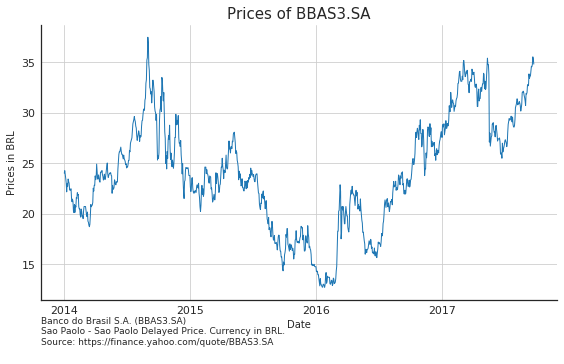

In [11]:
# using close prices
prices = data.close.copy()
# we convert to DataFrame to make easy store more series.
results_storage = prices.to_frame().copy()
# plotting
plot_this(prices, title='Prices of %s' % tckr, ylabel='Prices in BRL',
          txt_ymin=-0.2, bottom_adj=0.15, output_file='imgs/fig_prices.png',)

In [12]:
# extract some date information
results_storage['year'] = prices.index.year
results_storage['month'] = prices.index.month
results_storage['day'] = prices.index.day
results_storage['week_day'] = prices.index.dayofweek
results_storage['week_day_name'] = prices.index.strftime('%A')
results_storage.tail(10)

,close,year,month,day,week_day,week_day_name
Date,,,,,,
2017-09-12,33.380001,2017,9,12,1,Tuesday
2017-09-13,33.590000,2017,9,13,2,Wednesday
2017-09-14,33.619999,2017,9,14,3,Thursday
2017-09-15,34.110001,2017,9,15,4,Friday
2017-09-18,34.580002,2017,9,18,0,Monday
2017-09-19,34.540001,2017,9,19,1,Tuesday
2017-09-20,34.759998,2017,9,20,2,Wednesday
2017-09-21,35.520000,2017,9,21,3,Thursday
2017-09-22,35.299999,2017,9,22,4,Friday


# Trailing Returns

# Approach 1: starting from prices

In [13]:
approach1 = results_storage.groupby(['year', 'month'], )['close'].apply(total_return)
approach1.tail(12)

year  month
2016  10       0.254927
      11       0.020043
      12       0.055222
2017  1        0.129630
      2        0.058861
      3        0.005060
      4       -0.030115
      5       -0.137291
      6       -0.044223
      7        0.056312
      8        0.047782
      9        0.091251
Name: close, dtype: float64

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


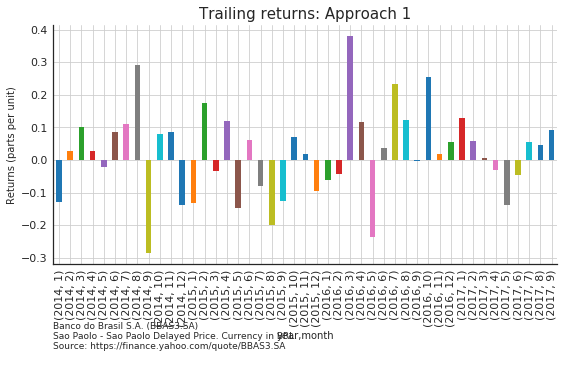

In [14]:
# ploting
# -------
plot_this(approach1, bar=True, title='Trailing returns: Approach 1',
          ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
          output_file='imgs/fig_rets_approach1.png')

> __Nota bene, What means approach 1:__
Means that we are selecting all available prices INSIDE a month and then we calculate the total return with that prices.

In [15]:
select_idx = (2017, 7)
idx_approach1 = results_storage.groupby(['year', 'month'])['close'].groups[select_idx]
last_group = results_storage.loc[idx_approach1]
last_group.head()
last_group.tail()

,close,year,month,day,week_day,week_day_name
Date,,,,,,
2017-07-25,29.559999,2017,7,25,1,Tuesday
2017-07-26,28.840000,2017,7,26,2,Wednesday
2017-07-27,28.590000,2017,7,27,3,Thursday
2017-07-28,28.559999,2017,7,28,4,Friday
2017-07-31,28.700001,2017,7,31,0,Monday


In [16]:
# example of the calculation
total_return(last_group.close), approach1.loc[select_idx]

(0.05631214574898791, 0.05631214574898791)

# Approach 2: starting from daily returns

In [17]:
r = prices.pct_change()
approach2 = r.groupby((r.index.year, r.index.month))\
             .apply(total_return_from_returns)

approach2.tail(12)

Date  Date
2016  10      0.284649
      11     -0.026972
      12     -0.014386
2017  1       0.107512
      2       0.063966
      3       0.020242
      4      -0.027243
      5      -0.137291
      6      -0.054340
      7       0.070896
      8       0.069686
      9       0.133550
Name: close, dtype: float64

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


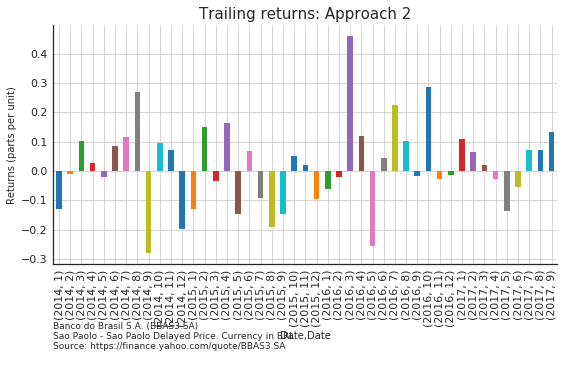

In [18]:
plot_this(approach2, bar=True, title='Trailing returns: Approach 2',
          ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
          output_file='imgs/fig_rets_approach2.png')

However, this approximation is almost correct since we have started from 2014 prices, therefore it is not possible to calculate the return of the first month of that first available year. This same situation occurs in the last month available (current), as no data are available for the last day of the month, the return is also not comparable with the rest.

# Approach 2.1 (update 23-07-2018)

Also wrong, it seems to work well but it fails in the same way as "approach 2" because it gives us a return at the end that shouldn't be there.

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


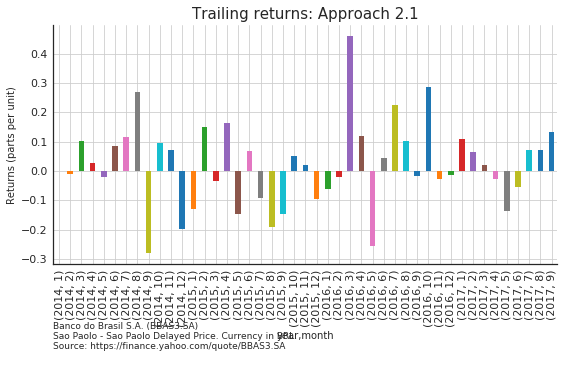

In [19]:
# approach 2.1: 
approach21 = results_storage.resample("M")\
                            .last()\
                            .set_index(['year', 'month'])\
                            .close\
                            .pct_change(1)
plot_this(approach21, bar=True, title='Trailing returns: Approach 2.1',
          ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25)

# Approach 3: Now yes, the definitive approach

What mean approach3, first trimm prices according to end of month this then with that prices calculate returns. So we are calculating returns between different months and mostly in differents days whichs always are the last bussiness day of the month.

In [20]:
# with "asfreq" we decimate the prices, then group by year and month, so we
# have all the prices at the end of the working month available in the DataFrame.
# Finally we calculate the return of this new series with "pct_change".
approach3 = results_storage.asfreq('BM')\
                           .set_index(['year', 'month'])\
                           .close\
                           .pct_change()
approach3.tail(12)

year  month
2016  9       -0.017665
      10       0.284649
      11      -0.026972
      12      -0.014386
2017  1        0.107512
      2        0.063966
      3        0.020242
      4       -0.027243
      5       -0.137291
      6       -0.054340
      7        0.070896
      8        0.069686
Name: close, dtype: float64

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


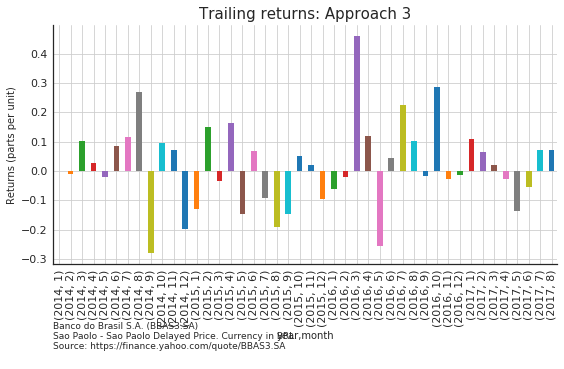

In [21]:
plot_this(approach3, bar=True, title='Trailing returns: Approach 3',
          ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
          output_file='imgs/fig_rets_approach3.png')

In [22]:
# Comparing all approaches
# ========================
all_approaches = pd.concat([approach1, approach2, approach21, approach3], axis=1,
                           keys=['approach1', 'approach2', 'approach21', 'approach3'])

In [23]:
all_approaches.head(12)

approach1  approach2  approach21  approach3
year month                                             
2014 1      -0.129583  -0.129583         NaN        NaN
     2       0.028827  -0.009095   -0.009095  -0.009095
     3       0.101449   0.101449    0.101449   0.101449
     4       0.026778   0.025877    0.025877   0.025877
     5      -0.021377  -0.021377   -0.021377  -0.021377
     6       0.087527   0.085627    0.085627   0.085627
     7       0.111467   0.115493    0.115493   0.115493
     8       0.291743   0.269841    0.269841   0.269841
     9      -0.285916  -0.281250   -0.281250  -0.281250
     10      0.078988   0.096047    0.096047   0.096047
     11      0.085130   0.071042    0.071042   0.071042
     12     -0.136578  -0.199663   -0.199663  -0.199663

In [24]:
all_approaches.tail(12)

approach1  approach2  approach21  approach3
year month                                             
2016 10      0.254927   0.284649    0.284649   0.284649
     11      0.020043  -0.026972   -0.026972  -0.026972
     12      0.055222  -0.014386   -0.014386  -0.014386
2017 1       0.129630   0.107512    0.107512   0.107512
     2       0.058861   0.063966    0.063966   0.063966
     3       0.005060   0.020242    0.020242   0.020242
     4      -0.030115  -0.027243   -0.027243  -0.027243
     5      -0.137291  -0.137291   -0.137291  -0.137291
     6      -0.044223  -0.054340   -0.054340  -0.054340
     7       0.056312   0.070896    0.070896   0.070896
     8       0.047782   0.069686    0.069686   0.069686
     9       0.091251   0.133550    0.133550        NaN

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


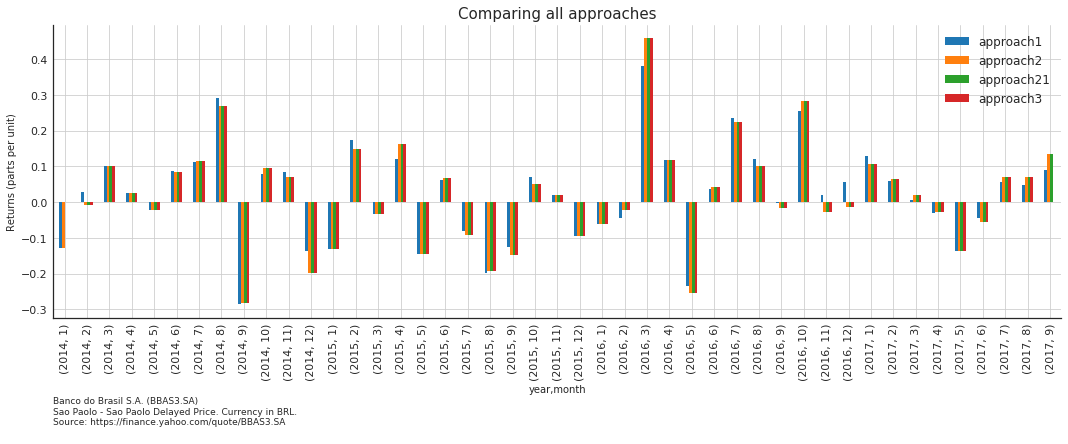

In [25]:
plot_this(all_approaches, title='Comparing all approaches',
          output_file='imgs/all_approaches.png', bar=True,
          ylabel='Returns (parts per unit)', bottom_adj=0.25, figsize=(15,6),
          txt_ymin=-0.4)